<a href="https://colab.research.google.com/github/koseemre/data-science/blob/master/ekg_signal_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install wfdb

In [0]:
pip install biosppy

In [0]:
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import wfdb
import biosppy

In [0]:
def get_records():
    """ Get paths for data in data/mit/ directory """
    #Download if doesn't exist
    
    # There are 3 files for each record
    # *.atr is one of them
    paths = glob('/path/to/MITDB/dataset/*.atr')

    # Get rid of the extension
    paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

In [0]:
def beat_annotations(annotation):
    """ Get rid of non-beat markers """
    """'N' for normal beats. Similarly we can give the input 'L' for left bundle branch block beats. 'R' for right bundle branch block
        beats. 'A' for Atrial premature contraction. 'V' for ventricular premature contraction. '/' for paced beat. 'E' for Ventricular
        escape beat."""
    
    good = ['N']   
    ids = np.in1d(annotation.symbol, good)

    # We want to know only the positions
    beats = annotation.sample[ids]

    return beats

In [0]:
 def segmentation(records):
    Normal = []
    for e in records:
        signals, fields = wfdb.rdsamp(e, channels = [0]) 

        ann = wfdb.rdann(e, 'atr')
        good = ['N']
        ids = np.in1d(ann.symbol, good)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                Normal.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
    return Normal

In [0]:
record = wfdb.rdrecord('a103l', pb_dir='challenge/2015/training/')

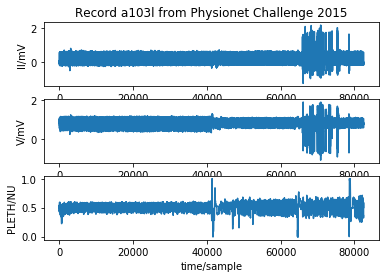

{'adc_gain': [7247.0, 10520.0, 12530.0],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0],
 'block_size': [0, 0, 0],
 'byte_offset': [24, 24, 24],
 'checksum': [-27403, -301, -17391],
 'comments': ['Asystole', 'False alarm'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'fs': 250,
 'init_value': [-171, 9127, 6042],
 'n_sig': 3,
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'record_name': 'a103l',
 'samps_per_frame': [1, 1, 1],
 'sig_len': 82500,
 'sig_name': ['II', 'V', 'PLETH'],
 'skew': [None, None, None],


In [16]:
wfdb.plot_wfdb(record=record, title='Record a103l from Physionet Challenge 2015') 
display(record.__dict__)

In [0]:
signals, fields = wfdb.rdsamp('100', pb_dir='mitdb', sampfrom=100, sampto=15000) 

ann = wfdb.rdann('100', 'atr', pb_dir='mitdb', sampfrom=100, sampto=15000)
Normal = []
good = ['N']
ids = np.in1d(ann.symbol, good)

imp_beats = ann.sample[ids]
beats = (ann.sample)
for i in imp_beats:
  beats = list(beats)
  j = beats.index(i)
  if(j!=0 and j!=(len(beats)-1)):
    x = beats[j-1]
    y = beats[j+1]
    diff1 = abs(x - beats[j])//2
    diff2 = abs(y - beats[j])//2
    Normal.append(signals[beats[j] - diff1: beats[j] + diff2, 0])

 

In [68]:
print(np.shape(Normal))
print(ann.sample.shape)
print(ann.symbol)
print(np.shape(ann.symbol))
print(ids.shape)

(47,)
(50,)
['N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
(50,)
(50,)


In [69]:
print(signals.shape)

(14900, 2)


In [0]:
f_signals = []
count = 1
peaks =  biosppy.signals.ecg.christov_segmenter(signal=signals[:, 0], sampling_rate = 300)[0]

for i in (peaks[1:-1]):
    diff1 = abs(peaks[count - 1] - i)
    diff2 = abs(peaks[count + 1]- i)
    x = peaks[count - 1] + diff1//2
    y = peaks[count + 1] - diff2//2
    signal = signals[x:y]
    f_signals.append(signal)
    count += 1


In [88]:
print(signals[:, 0])

[-0.33  -0.335 -0.33  ... -0.52  -0.54  -0.545]


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


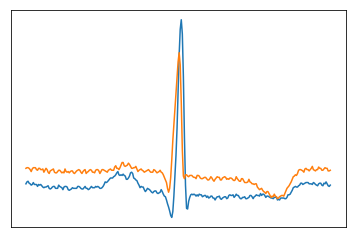

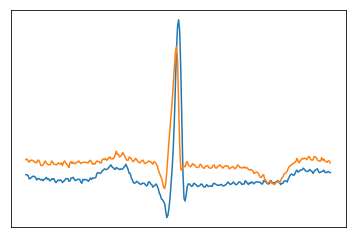

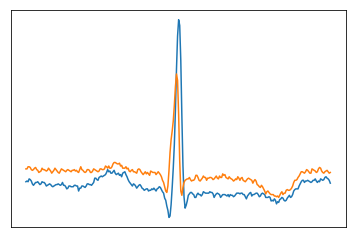

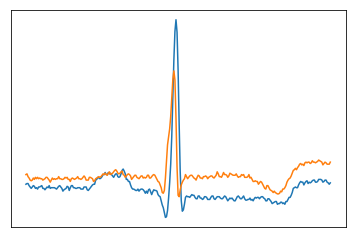

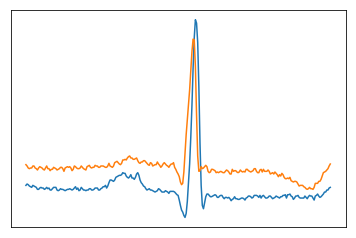

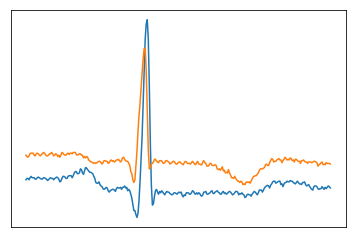

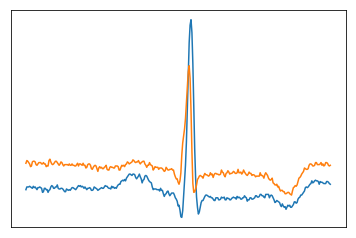

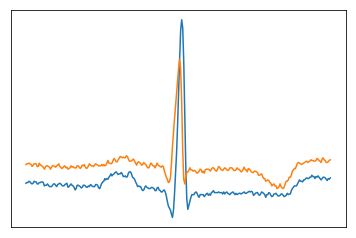

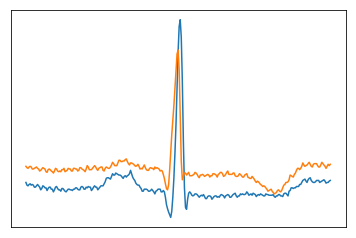

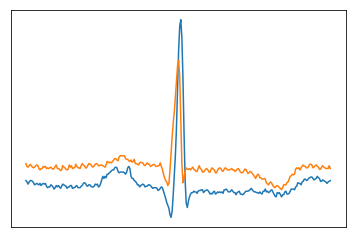

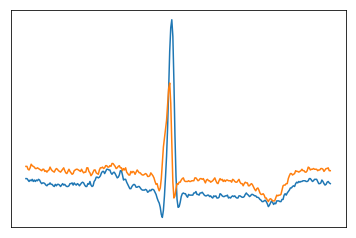

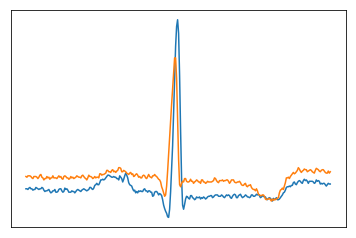

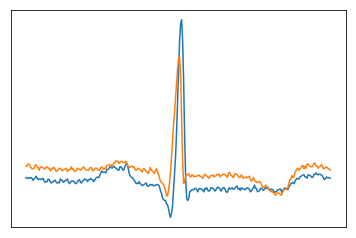

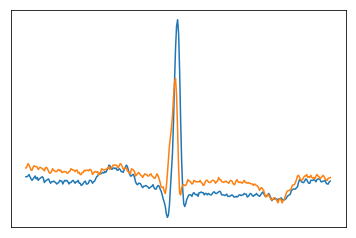

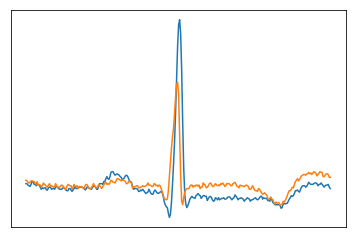

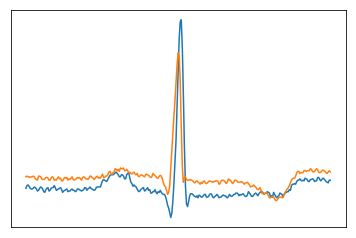

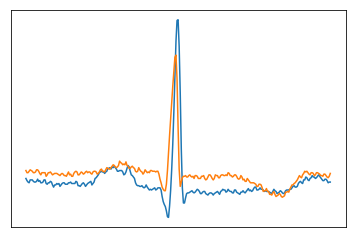

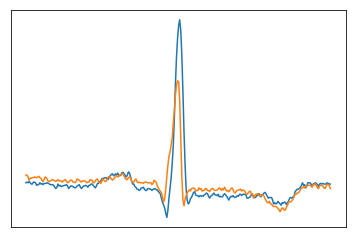

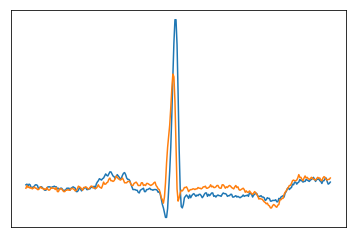

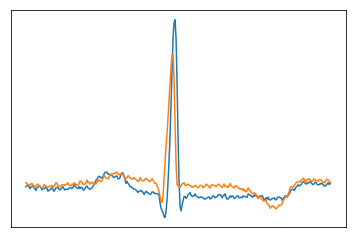

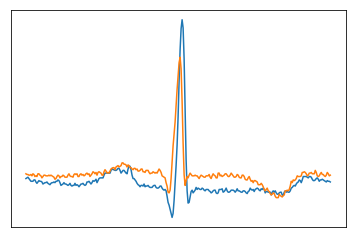

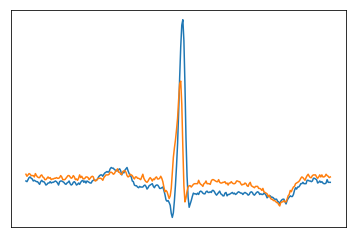

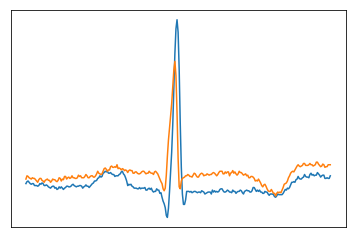

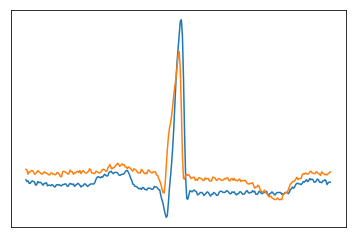

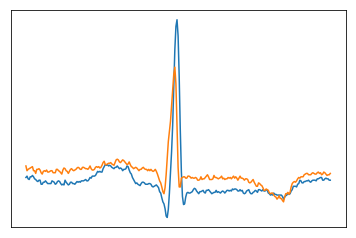

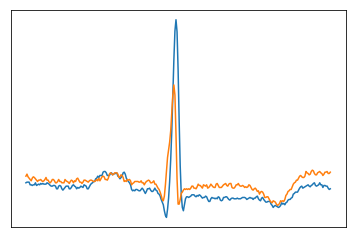

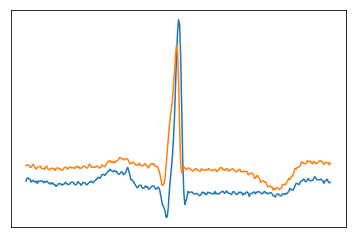

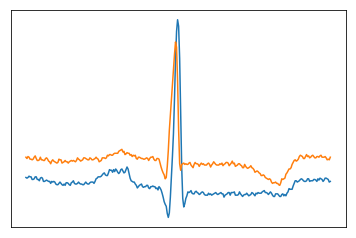

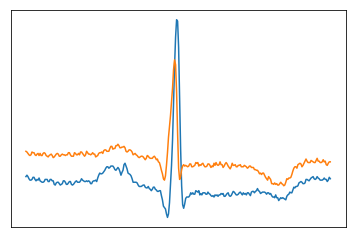

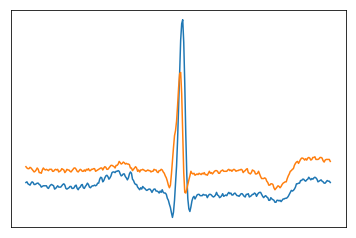

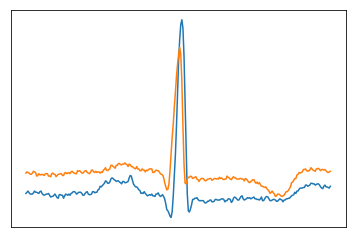

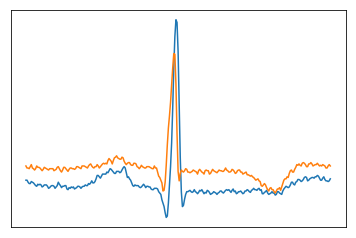

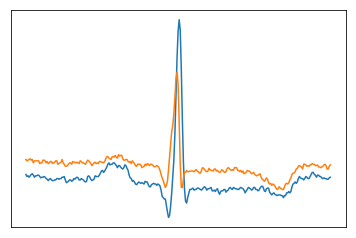

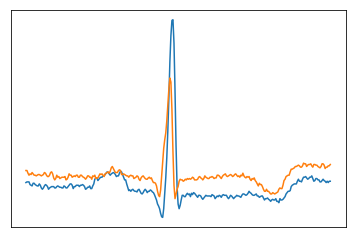

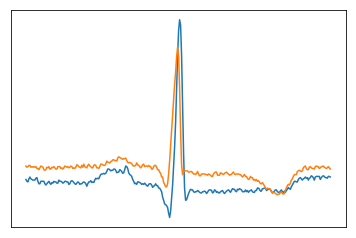

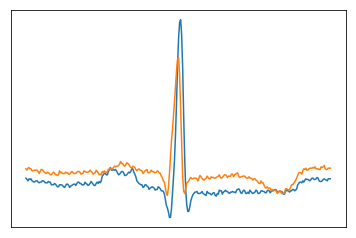

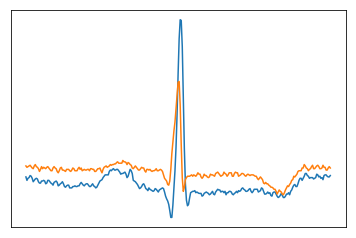

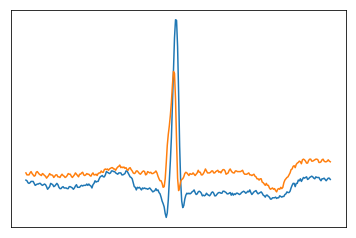

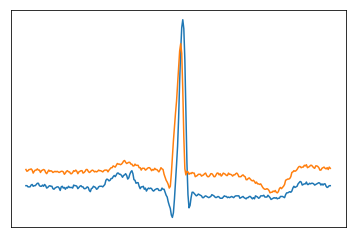

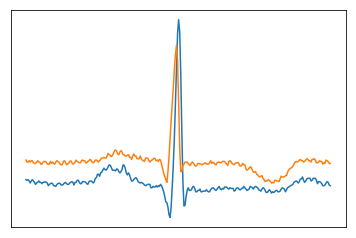

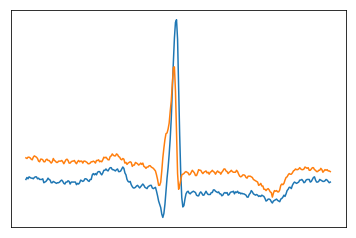

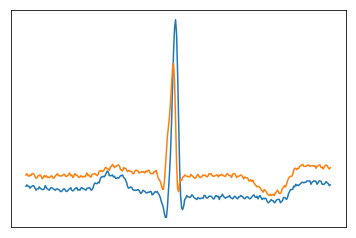

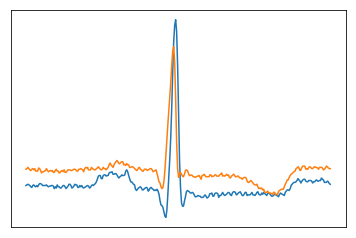

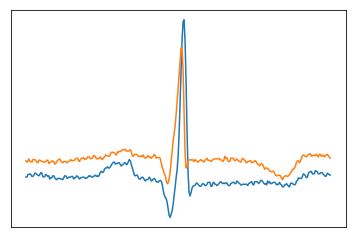

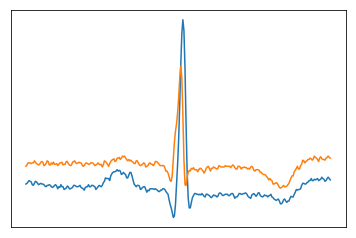

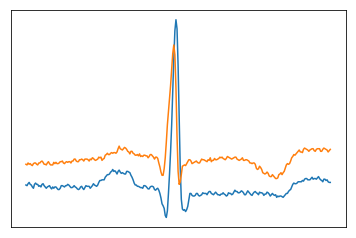

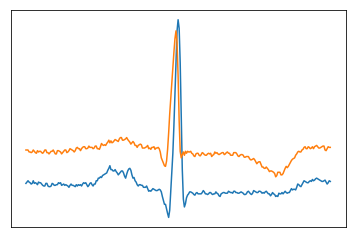

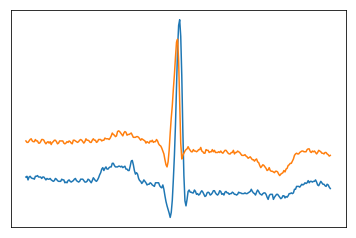

In [77]:
for count, i in enumerate(f_signals):
  fig = plt.figure(frameon=False)
  plt.plot(i) 
  plt.xticks([]), plt.yticks([])
  for spine in plt.gca().spines.values():
     spine.set_visible(False)

  filename = str(count)+'.png'
  fig.savefig(filename)
  im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
  im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
  cv2.imwrite(filename, im_gray)
  from google.colab import files
  plt.savefig("abc.png")
  files.download("abc.png") 